In [1]:
import os
import sys

import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# ====================
# load mla python library
# ====================
repo_dir = os.path.dirname(os.getcwd())

src_dir = os.path.join(
    repo_dir,
    'src'
)

if src_dir not in sys.path:
    sys.path.append(src_dir)

from mla_reconstruction import _load_mla_data_into_hdf5

In [3]:
# ======================
# load data
# ======================
exmpl_dir = 'examples'
data_dir = 'test_data'
data_subdir = '20210604_MLA_DCoffset_test'

mla_txt_fn = os.path.join(
    repo_dir,
    exmpl_dir,
    data_dir,
    data_subdir,
    'Measurement of 2021-06-04 1734.txt'
)

mla_fn = mla_txt_fn.replace('.txt', '.hdf5')

In [10]:
# ======================
# convert data from txt to hdf5
#      already completed
# ======================
mla_fn = _load_mla_data_into_hdf5(
    mla_txt_fn,
    resize_curr=(5,5,5,159),
    resize_cond=(5,5,5,159),
    pixel_number=125,
    mode='x',
    add_dc_value=False
)

Processed 0/125
Dc Value: 0.677215

Dc Value: 0.765646

Dc Value: 0.936508

Dc Value: 1.277451

Dc Value: 1.958819

Dc Value: 0.676598

Dc Value: 0.781468

Dc Value: 0.992397

Dc Value: 1.443279

Dc Value: 2.437507

Processed 10/125
Dc Value: 0.675736

Dc Value: 0.764662

Dc Value: 0.929002

Dc Value: 1.226434

Dc Value: 1.787301

Dc Value: 0.676177

Dc Value: 0.774461

Dc Value: 0.973439

Dc Value: 1.376464

Dc Value: 2.205650

Processed 20/125
Dc Value: 0.675265

Dc Value: 0.754955

Dc Value: 0.909755

Dc Value: 1.222721

Dc Value: 1.951105

Dc Value: 0.672501

Dc Value: 0.759818

Dc Value: 0.936863

Dc Value: 1.309212

Dc Value: 2.099158

Processed 30/125
Dc Value: 0.674889

Dc Value: 0.761883

Dc Value: 0.931684

Dc Value: 1.287916

Dc Value: 1.988855

Dc Value: 0.677055

Dc Value: 0.784980

Dc Value: 0.993580

Dc Value: 1.430944

Dc Value: 2.315167

Processed 40/125
Dc Value: 0.679376

Dc Value: 0.783980

Dc Value: 0.985079

Dc Value: 1.435303

Dc Value: 2.330484

Dc Value: 0.6764

In [12]:
mla = h5py.File(mla_fn, 'r')

dset = mla['dset']
curr = mla['curr']
cond = mla['cond']
lin_en = np.array(mla['lin_en'])

prm = dict(dset.attrs.items())


Text(0.5, 0, 'energy [V]')

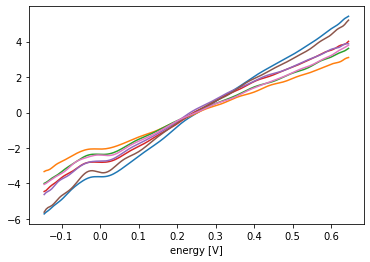

In [13]:
plt.plot(lin_en, curr[-1,-1,-1,:])
plt.plot(lin_en, curr[-1,-5,-1,:])
plt.plot(lin_en, curr[-3,-1,-1,:])
plt.plot(lin_en, curr[-4,-3,-1,:])
plt.plot(lin_en, curr[-3,-2,-1,:])
plt.plot(lin_en, curr[-2,-2,-1,:])
plt.plot(lin_en, curr[-1,-3,-1,:])


plt.xlabel('energy [V]')

In [15]:
n_zsweep = 5

# =============
# setup colormap
# =============
cm = matplotlib.cm.viridis
cm_lst = [cm.colors[int(i/n_zsweep * 256)] for i in range(n_zsweep)]


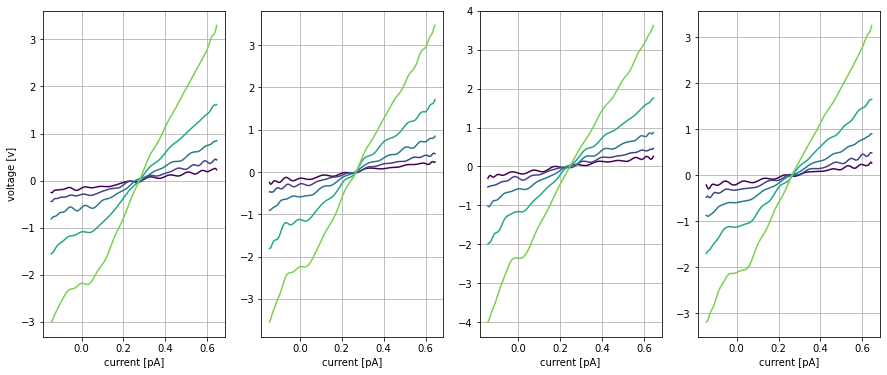

In [16]:
fig = plt.figure(figsize=(15,6))

ax_sttngs = {
    'xlabel':   'current [pA]'
}

# ====================
# plot 1
# ====================
ax1 = fig.add_subplot(141, **ax_sttngs)

n_point1 = 0
for idz in range(n_zsweep):
    ax1.plot(
        np.array(lin_en),
        np.array(curr[0,0,idz,:]),
        c=cm_lst[idz]
    )
ax1.grid()
ax1.set_ylabel('voltage [v]')

# ====================
# plot 2
# ====================
ax2 = fig.add_subplot(142, **ax_sttngs)

n_point1 = 1000
for idz in range(n_zsweep):
    ax2.plot(
        np.array(lin_en),
        np.array(curr[1,1,idz,:]),
        c=cm_lst[idz]
    )
ax2.grid()

    
# ====================
# plot 3
# ====================
ax3 = fig.add_subplot(143, **ax_sttngs)

n_point1 = 2000
for idz in range(n_zsweep):
    ax3.plot(
        np.array(lin_en),
        np.array(curr[2,4,idz,:]),
        c=cm_lst[idz]
    )
ax3.grid()

    
# ====================
# plot 4
# ====================
ax4 = fig.add_subplot(144, **ax_sttngs)

n_point1 = 3000
for idz in range(n_zsweep):
    ax4.plot(
        np.array(lin_en),
        np.array(curr[3,1,idz,:]),
        c=cm_lst[idz]
    )
ax4.grid()




In [19]:
mla.close()